# Rotinas para plotagem dos gráficos com as componentes do Campo Geomagnéticos observados em VSS e suas variações seculares

*Importando as bibliotecas necessárias

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import glob
import pandas as pd
import math as math
import os

In [87]:
VSS= np.loadtxt(fname='media_anual_VSS.csv', delimiter=',', usecols= (0,1,2,3,4,5,6,7))

In [88]:
igrf = np.loadtxt(fname='igrf_vassouras.csv', delimiter=',')

# Obtenção da variação secular (VS) de cada componete do campo principal.

### Usando a função `sec_var(a)` iremos determinar para cada compnente (x,y, z, f, i, h e d)

*Os cálculos foram feitos para os dados de vassouras e tbem para o modelo igrf (nesse já havia os valores de VS, entretanto não parecia muito confiável).

In [89]:
def sec_var(a):
    "determine secular variation for components of geomagnetic field."
    '''
    a - column data
    '''
    
    N = a.size
    sv = np.zeros(N)
    
    for i in range(N-1):
        sv[i+1] = a[i+1] - a[i]
    
    return sv

In [112]:
#SECULAR VARIATION FOR VASSOURAS MAGNETIC OBSERVATORY DATA FROM 1915 TO 2015:
  
sv_x = sec_var(VSS[:,4])
sv_y = sec_var(VSS[:,5])
sv_z = sec_var(VSS[:,6])


# Gráficos 

*Testando as dimensões dos eixos X e Y

In [91]:
yr=VSS[:,0]
print('yr', len(yr))
d = VSS[:,1]
print('D', len(d))
igrf_d=igrf[:,1]
print('igrf',len(igrf))

yr 101
D 101
igrf 101


## Declinação

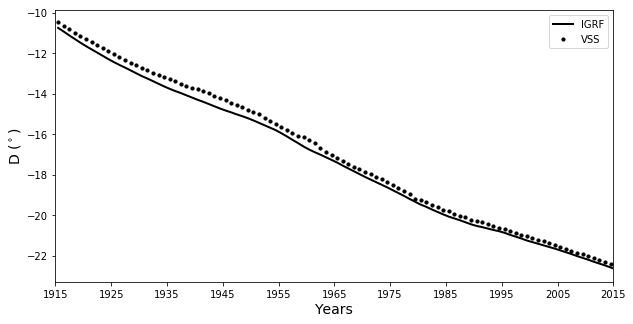

In [92]:
yr= VSS[:,0]
decli = VSS[:,1]
d= decli/60
igrf_d = igrf[:,1]

fig = plt.figure(figsize=(10.0, 5.0))

Vass = plt.scatter(yr,d , 10, label="VSS", color='black')
IGRF = plt.plot(yr,igrf_d, label="IGRF", linestyle='solid', color='black', linewidth=2)

#plt.title('Declination from Vassouras Magnetic Observatory (1915-2008)')
plt.legend([Vass], ["Vass"])
plt.legend()

plt.ylabel('D ($^\circ)$', fontsize=14)
plt.xlabel('Years', fontsize=14)
#plt.ylabel('Declination (degree)')
#plt.xlabel('Years')
plt.xticks(np.arange(1915, 2016, 10))
pylab.xlim([1915,2015])
plt.show()

fig.savefig('D.png', dpi=300)

#plt.grid(True)

#pylab.ylim([15000,25000])

#plt.savefig('Z_1915-2015.png', bbox_inches='tight',dpi=500)
#plt.show()

## Inclinação

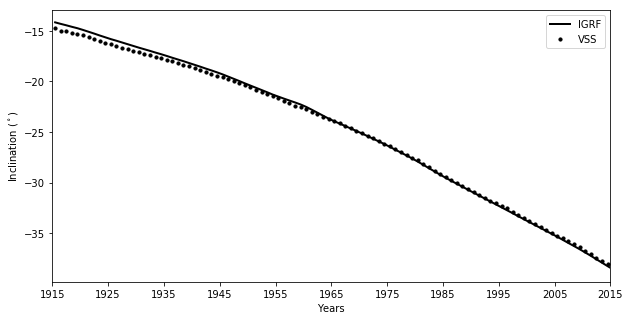

In [93]:
yr = VSS[:,0]
inc = VSS[:,2]
i= inc/60

igrf_i = igrf[:,3]

fig = plt.figure(figsize=(10.0, 5.0))

Vass = plt.scatter(yr,i, 10, label="VSS", color='black')
IGRF = plt.plot(yr,igrf_i, label="IGRF", linestyle='solid', color='black', linewidth=2)

#plt.title('Inclination from Vassouras Magnetic Observatory (1915-2008)')
plt.legend([Vass], ["VSS"])
plt.legend()


plt.ylabel('Inclination ($^\circ$)')
plt.xlabel('Years')

plt.xticks(np.arange(1915, 2016, 10))
pylab.xlim([1915,2015])
plt.show()


fig.savefig('I.png', dpi=300)

## Intensidade do Campo Magnético F

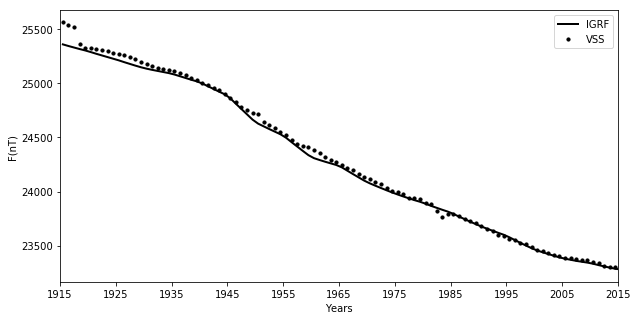

In [94]:
yr = VSS[:,0]
f = VSS[:,7]
igrf_f = igrf[:,13]

fig = plt.figure(figsize=(10.0, 5.0))

Vass = plt.scatter(yr,f, 10, label="VSS", color='black')
IGRF = plt.plot(yr,igrf_f, label="IGRF", linestyle='solid', color='black', linewidth=2)

#plt.title('F from Vassouras Magnetic Observatory (1915-2008)')
plt.legend([Vass], ["VSS"])
plt.legend()

plt.ylabel('F(nT)')
plt.xlabel('Years')
plt.xticks(np.arange(1915, 2016, 10))
pylab.xlim([1915,2015])
plt.show()



fig.savefig('F.png', dpi=300)

## Componente H

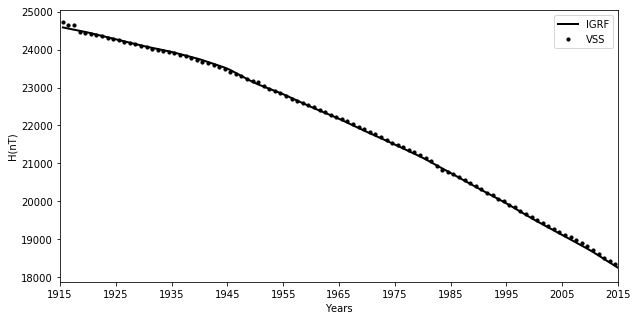

In [97]:
yr = VSS[:,0]
H = VSS[:,3]
igrf_H = igrf[:,5]

fig = plt.figure(figsize=(10.0, 5.0))

Vass = plt.scatter(yr,H, 10, label="VSS", color='black')
IGRF = plt.plot(yr,igrf_H, label="IGRF", linestyle='solid', color='black', linewidth=2)

#plt.title('F from Vassouras Magnetic Observatory (1915-2008)')
plt.legend([Vass], ["VSS"])
plt.legend()

plt.ylabel('H (nT)')
plt.xlabel('Years')
plt.xticks(np.arange(1915, 2016, 10))
pylab.xlim([1915,2015])
plt.show()


fig.savefig('H.png', dpi=300)

# COMPONENTE X

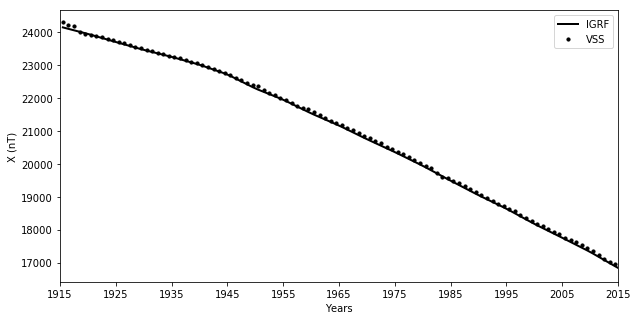

In [107]:
yr = VSS[:,0]
x = VSS[:,4]
igrf_x = igrf[:,7]

fig = plt.figure(figsize=(10.0, 5.0))

Vass = plt.scatter(yr,x, 10, label="VSS", color='black')
IGRF = plt.plot(yr,igrf_x, label="IGRF", linestyle='solid', color='black', linewidth=2)

#plt.title('X magnitudes from Vassouras Magnetic Observatory (1915-2008)')
plt.legend([Vass], ["VSS"])
plt.legend()

plt.ylabel('X (nT)')
plt.xlabel('Years')
plt.xticks(np.arange(1915, 2016, 10))
pylab.xlim([1915,2015])
plt.show()

fig.savefig('X.png', dpi=300)

## Componente Y

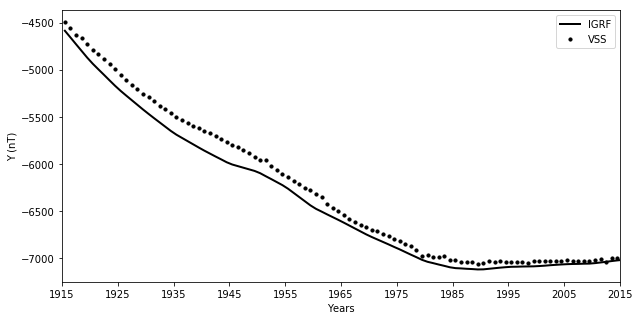

In [104]:
yr = VSS[:,0]
y = VSS[:,5]
igrf_y = igrf[:,9]

fig = plt.figure(figsize=(10.0, 5.0))

Vass = plt.scatter(yr,y, 10, label="VSS", color='black')
IGRF = plt.plot(yr,igrf_y, label="IGRF", linestyle='solid', color='black', linewidth=2)

#plt.title('X magnitudes from Vassouras Magnetic Observatory (1915-2008)')
plt.legend([Vass], ["VSS"])
plt.legend()

plt.ylabel('Y (nT)')
plt.xlabel('Years')
plt.xticks(np.arange(1915, 2016, 10))
pylab.xlim([1915,2015])
plt.show()

fig.savefig('Y.png', dpi=300)

# Componente Z

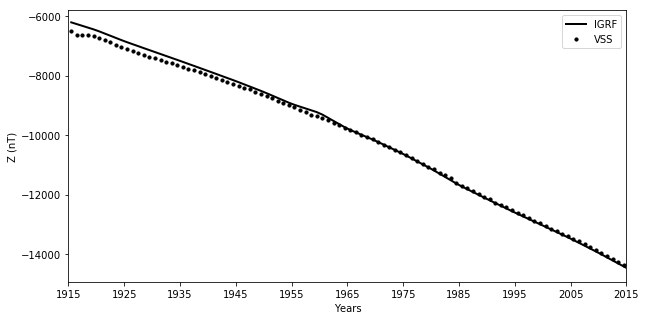

In [106]:
yr = VSS[:,0]
z = VSS[:,6]
igrf_z = igrf[:,11]

fig = plt.figure(figsize=(10.0, 5.0))

Vass = plt.scatter(yr,z, 10, label="VSS", color='black')
IGRF = plt.plot(yr,igrf_z, label="IGRF", linestyle='solid', color='black', linewidth=2)

#plt.title('X magnitudes from Vassouras Magnetic Observatory (1915-2008)')
plt.legend([Vass], ["VSS"])
plt.legend()

plt.ylabel('Z (nT)')
plt.xlabel('Years')
plt.xticks(np.arange(1915, 2016, 10))
pylab.xlim([1915,2015])
plt.show()

fig.savefig('Z.png', dpi=300)

# VARIAÇÃO SECULAR 
* ### X Y e Z

### Variação secular par X, com dispersão e com linhas

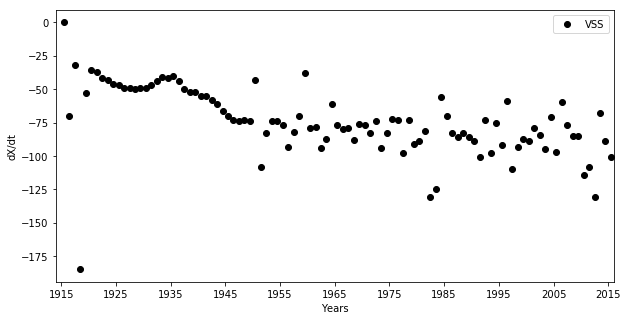

In [134]:

fig = plt.figure(figsize=(10.0, 5.0))

Vass = plt.scatter(yr,sv_x, label="VSS", color='black')
#IGRF = plt.scatter(yr,sv_d, label="IGRF", color='gray')

#plt.title('Secular Variation for Declination from Vassouras Magnetic Observatory (1915-2015)')
plt.legend([Vass], ["Vass"])
plt.legend()


plt.ylabel('dX/dt')
plt.xlabel('Years')
plt.xticks(np.arange(1915, 2016, 10))
pylab.xlim([1914,2016])
plt.show()

fig.savefig('SV_X.png', dpi=300)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000023DAE99D400>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


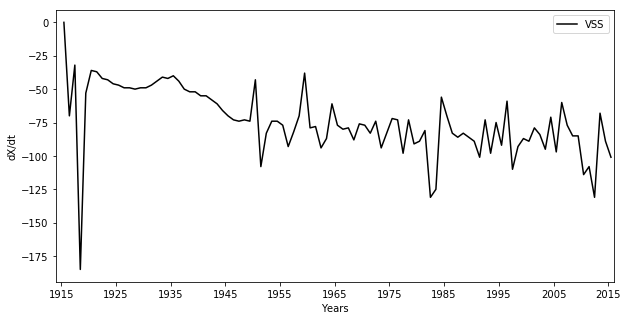

In [135]:
yr= VSS[:,0]
sv_x = sec_var(VSS[:,4])
#igrf_svd = sec_var(igrf[:,1])

fig = plt.figure(figsize=(10.0, 5.0))

Vass = plt.plot(yr,sv_x, label="VSS", color='black')
#Vass = plt.scatter(yr,sv_x, label="VSS", color='red')
#IGRF = plt.scatter(yr,sv_d, label="IGRF", color='gray')

#plt.title('Secular Variation for Declination from Vassouras Magnetic Observatory (1915-2015)')
plt.legend([Vass], ["Vass"])
plt.legend()


plt.ylabel('dX/dt')
plt.xlabel('Years')
plt.xticks(np.arange(1915, 2016, 10))
pylab.xlim([1914,2016])
plt.show()
fig.savefig('SV_XLINE.png', dpi=300)


### Secular variation para Y

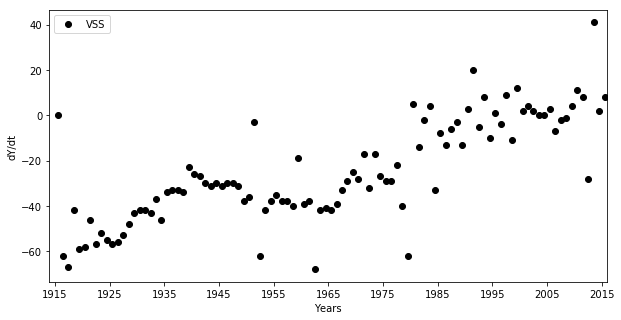

In [136]:
fig = plt.figure(figsize=(10.0, 5.0))

Vass = plt.scatter(yr,sv_y, label="VSS", color='black')
#IGRF = plt.scatter(yr,sv_d, label="IGRF", color='gray')

#plt.title('Secular Variation for Declination from Vassouras Magnetic Observatory (1915-2015)')
plt.legend([Vass], ["Vass"])
plt.legend()


plt.ylabel('dY/dt')
plt.xlabel('Years')
plt.xticks(np.arange(1915, 2016, 10))
pylab.xlim([1914,2016])
plt.show()

fig.savefig('SV_y.png', dpi=300)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000023DAFB4F080>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


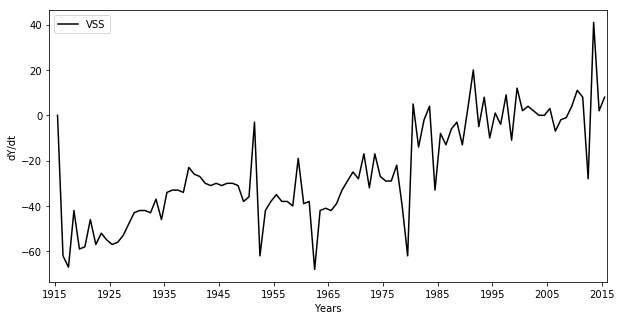

In [137]:
fig = plt.figure(figsize=(10.0, 5.0))

Vass = plt.plot(yr,sv_y, label="VSS", color='black')
#Vass = plt.scatter(yr,sv_x, label="VSS", color='red')
#IGRF = plt.scatter(yr,sv_d, label="IGRF", color='gray')

#plt.title('Secular Variation for Declination from Vassouras Magnetic Observatory (1915-2015)')
plt.legend([Vass], ["VSS"])
plt.legend()


plt.ylabel('dY/dt')
plt.xlabel('Years')
plt.xticks(np.arange(1915, 2016, 10))
pylab.xlim([1914,2016])
plt.show()

fig.savefig('SV_YLINE.png', dpi=300)

### Variação secular para Z 

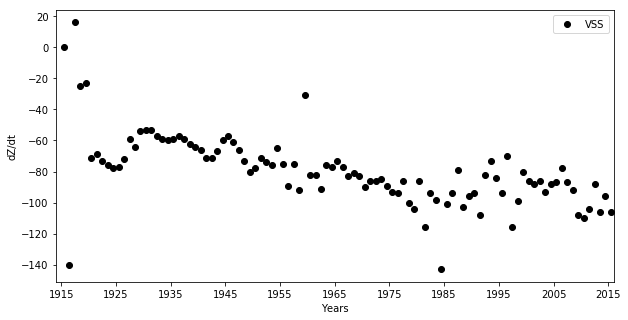

In [138]:
fig = plt.figure(figsize=(10.0, 5.0))

Vass = plt.scatter(yr,sv_z, label="VSS", color='black')
#IGRF = plt.scatter(yr,sv_d, label="IGRF", color='gray')

#plt.title('Secular Variation for Declination from Vassouras Magnetic Observatory (1915-2015)')
plt.legend([Vass], ["Vass"])
plt.legend()


plt.ylabel('dZ/dt')
plt.xlabel('Years')
plt.xticks(np.arange(1915, 2016, 10))
pylab.xlim([1914,2016])
plt.show()

fig.savefig('SV_z.png', dpi=300)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:634: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000023DAA14CB70>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


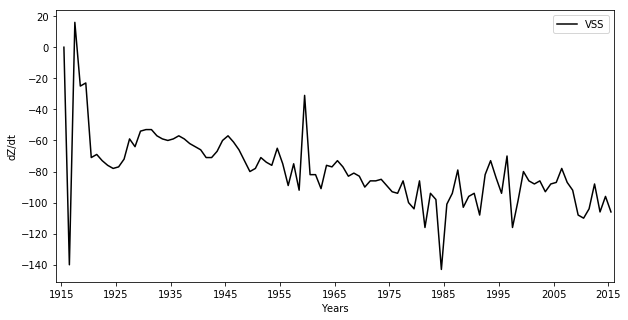

In [139]:
fig = plt.figure(figsize=(10.0, 5.0))

Vass = plt.plot(yr,sv_z, label="VSS", color='black')
#Vass = plt.scatter(yr,sv_x, label="VSS", color='red')
#IGRF = plt.scatter(yr,sv_d, label="IGRF", color='gray')

#plt.title('Secular Variation for Declination from Vassouras Magnetic Observatory (1915-2015)')
plt.legend([Vass], ["VSS"])
plt.legend()


plt.ylabel('dZ/dt')
plt.xlabel('Years')
plt.xticks(np.arange(1915, 2016, 10))
pylab.xlim([1914,2016])
plt.show()

fig.savefig('SV_ZLINE.png', dpi=300)